# <font color='navygray'>MF013 Análisis de inversión:  Introducción a Algotrading</font>
Por Carlos Crespo Elizondo, MSF<br>
Clase del 28-10-20

# <font color='navygray'>SOBRE LOS ARCHIVOS CSV</font>


La mayoría de los datos que vamos a usar en la clase, los vamos a obtener en archivos CSV. Son archivos de texto simple, separados por coma.  CSV es la abreviación de "Comma Separated Values", o valores separados por coma.<br><br>
En la mayoría de los archivos CSV, la primer fila representa los encabezados de las columnas.  Todas las filas posteriores, representan entradas de datos.  En algunos casos, las primeras filas representan espcificaciones del archivo en cuestión. 

# <font color='navygray'>Importar librerías</font>

Estas son las librerías que utilizamos.  En la clase importé a mitad del camino la librería *__numpy__* para calcular el LN de los retornos.  Por cuestión de orden lo voy a poner al inicio!

In [1]:
import pandas as pd
import numpy as np

## <font color='navygray'>1. Crear funciones</font>
Las funciones es un bloque de código diseñado para hacer un trabajo específico.  Para realizar la tarea programada en la función, solo necesitamos _**llamar**_ a la función con su nombre.<br><br>
Las funciones pueden:
* Recibir valores
* Tener valores predeterminados *por defalut* para el caso en que no se definan valores
* NO RECIBIR VALORES!
* Regresar un resultado
* No regresar nada

Vamos a hacer una función que su objetivo sea sumar dos valores que recibe al momento de ser llamada:

In [2]:
def funcion_sumar(x, y):
    suma = x + y
    
    return suma

1. Definimos la función *__funcion_sumar__* y espera recibir dos valores que seran guardados en las variables "*x*" y "*y*"
1. Realizamos la suma de "*x*" y "*y*" y el resultado lo guardamos en la variable __*suma*__
1. 
1. Regresamos el valor de __*suma*__

La siguiente celda la definí solamente para explicar a que sustituye la función anterior

In [3]:
a = 10
b = 40
suma = a + b
print(suma)

50


Vamos a llamar a nuestra función __*suma*__ para realizar la suma de 100 + 100:

In [4]:
funcion_sumar(100,100)

200

También podemos definir el valor de cada variable:

In [5]:
funcion_sumar(y = 50, x = 80)

130

Las funciones pueden tener valores *por default*.  Si al momento de llamar a la función NO se especifican valores, entran en automático los valores *default*.  Si al llamar la función SI se especifican valores, los valores espcificados son los que se toman en cuenta.<br><br>
REALIZAR FUNCION MULTIPLICAR, ASIGNAR VALORES POR DEFAULT, LA FUNCION DEBE DE ENTREGAR EL RESULTADO DE LA MULTIPLICACION:

In [6]:
def funcion_multiplicar(x=10, y=8):
    mult = x * y  
    
    return mult

In [7]:
funcion_multiplicar(2, 4)

8

Por lo general el resultado regresado de una función se guarda en una variable:

In [11]:
resultado = funcion_multiplicar(2, 4)

In [12]:
print(resultado)
print(resultado * 4)

8
32


In [8]:
def funcion_multiplicar2(x=10, y=8):
    mult = x * y  
    print(mult)
    return mult

In [9]:
x = funcion_multiplicar2()

80


In [10]:
print(x)

80



## <font color='navygray'>2. Importar Precios WALMEX</font>
Pasos:
1. Importar datos de internet, guardarlos en un DataFrame de pandas y gurdarlo como "__*df*__"
1. Formato del DataFrame:
    * Index: Columna de fechas
    * Fecha más antigua:  Index 0
    * Fecha más reciente:  Index -1
    * Nombre y órden de las columnas: "Apertura", "Maximo", "Minimo", "Cierre"$^+$
1. Crear una columna del DataFrame con los Retornos logarítmicos de los precios de cierre diarios
1. Realizar las siguientes gráficas:
    * Precios de cierre
    * Retornos diarios
    * Histograma de los retornos
1. Realizar una sola figura con las tres gráficas del punto anterior
<br><br>

__**NOTAS:__<br>
$+$ No te recomiendo utilizar acentos al momento de definir el nombre de variables, columnas, df, etc.

### <font color='navygray'>2.1 Importar datos de internet</font>

La información la vamos a obtener del link definido en 'url'

In [15]:
url = 'http://bit.ly/oncedos-walmex'

Esta es la lista de las emisoras que tengo sus series de tiempo.  Lo unico que deben de hacer es susituir en el url anterior "walmex" por la empresa que quieran obtener sus datos
<table>
    <tr>
      <th><center></center></th>
      <th><center></center></th>
      <th><center></center></th>
      <th><center></center></th>
  </tr>
    
  <tr>
    <td style="text-align:center;">ac</td>
    <td style="text-align:center;">alfaa</td>
    <td style="text-align:center;">alpeka</td>
    <td style="text-align:center;">alsea</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">amxl</td>
    <td style="text-align:center;">asurb</td>
    <td style="text-align:center;">bimboa</td>
    <td style="text-align:center;">bolsaa</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">cemexcpo</td>
    <td style="text-align:center;">elektra</td>
    <td style="text-align:center;">femsaubd</td>
    <td style="text-align:center;">gapb</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">gcarsoa1</td>
    <td style="text-align:center;">gcc</td>
    <td style="text-align:center;">gmexicob</td>
    <td style="text-align:center;">grumab</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">ienova</td>
    <td style="text-align:center;">kimbera</td>
    <td style="text-align:center;">kofubl</td>
    <td style="text-align:center;">labb</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">livepolc1</td>
    <td style="text-align:center;">megacpo</td>
    <td style="text-align:center;">omab</td>
    <td style="text-align:center;">orbia</td>
  </tr>

  <tr>
    <td style="text-align:center;">penoles</td>
    <td style="text-align:center;">pinfra</td>
    <td style="text-align:center;">tlevisacpo</td>
    <td style="text-align:center;">walmex</td>
  </tr>

  <tr>
    <td style="text-align:center;"></td>
    <td style="text-align:center;"></td>
    <td style="text-align:center;"></td>
    <td style="text-align:center;"></td>
  </tr>

  <tr>
    <td style="text-align:center;"></td>
    <td style="text-align:center;"></td>
    <td style="text-align:center;"></td>
    <td style="text-align:center;"></td>
  </tr>

</table>

La función de pandas *__read_csv__*, lee archivos CSV y los guarda en un DataFrame.  La manera más sencilla para importar datos csv es simplemente definir el *file paht*.  En este caso es una dirección de internet, pero también puede ser un direcotorio en tu compu, etc.

In [16]:
df = pd.read_csv(url)

Vamos a visualizar la información del DataFrame.  Para esto tenemos varias maneras de hacerlo:
1. .head(...):  Nos entrega los primero 5 renglones del DataFrame, al menos que especifiquemos otro número
1. .tail(...):  Nos entrega los últimos 5 renglones del DataFrame, al menos que especifiquemos otro número
1. .info( ):  Nos da un resumen del tipo de datos en el DataFrmae

In [17]:
df.head()

,Security,WALMEX* MF Equity,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Start Date,31/12/2009 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,End Date,04/10/2019 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Period,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Currency,MXN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos observar los siguientes puntos del DF:
1. Los titulos de las columnas NO SON los que queremos
1. Las primeras 6 filas es basura

In [18]:
df.tail(10)

,Security,WALMEX* MF Equity,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
2451,15/01/2010,30.785,NaN,NaN,30.625,NaN,NaN,30.9,NaN,NaN,30.56,NaN,NaN
2452,14/01/2010,30.615,NaN,NaN,30.54,NaN,NaN,31.065,NaN,NaN,30.275,NaN,NaN
2453,13/01/2010,30.54,NaN,NaN,30.875,NaN,NaN,31.62,NaN,NaN,30.35,NaN,NaN
2454,12/01/2010,30.875,NaN,NaN,30.3,NaN,NaN,31.1,NaN,NaN,30.24,NaN,NaN
2455,11/01/2010,30.365,NaN,NaN,29.68,NaN,NaN,30.675,NaN,NaN,29.68,NaN,NaN
2456,08/01/2010,29.68,NaN,NaN,29.88,NaN,NaN,29.88,NaN,NaN,29.5,NaN,NaN
2457,07/01/2010,29.805,NaN,NaN,30.5,NaN,NaN,30.5,NaN,NaN,29.755,NaN,NaN
2458,06/01/2010,30.365,NaN,NaN,30.35,NaN,NaN,30.5,NaN,NaN,30.145,NaN,NaN
2459,05/01/2010,30.365,NaN,NaN,29.78,NaN,NaN,30.585,NaN,NaN,29.69,NaN,NaN
2460,04/01/2010,29.78,NaN,NaN,29.95,NaN,NaN,30.1,NaN,NaN,29.155,NaN,NaN


Podemos observar los siguientes puntos del final del DF:
1. Las fechas no están en el INDEX

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 13 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Security                                                          2460 non-null   object
 1   WALMEX* MF Equity                                                 2460 non-null   object
 2   Unnamed: 2                                                        700 non-null    object
 3   Unnamed: 3                                                        700 non-null    object
 4   Unnamed: 4                                                        2456 non-null   object
 5   Unnamed: 5                                                        700 non-null    object
 6   Unnamed: 6                                                        700 non-null    object
 7   Unnamed: 7                                

Podemos ver con .info que las columnas no tienen valores númericos sino OBJECT.  Esta importación no funcionó, ahora vamos a cargar los datos nuevamente pero saltando las primeras 6 filas con la opción *__skiprow__*:

In [20]:
df = pd.read_csv(url, skiprows = 6)
df.head()

,Date,PX_LAST,Change,% Change,PX_OPEN,Change.1,% Change.1,PX_HIGH,Change.2,% Change.2,PX_LOW,Change.3,% Change.3
0,04/10/2019,58.92,0.73,1.254511,58.08,-0.11,-0.189036,59.05,0.86,1.477917,57.96,-0.23,-0.395257
1,03/10/2019,58.19,0.79,1.376307,57.40,0.00,0.000000,58.31,0.91,1.585366,57.11,-0.29,-0.505226
2,02/10/2019,57.40,-1.08,-1.846785,58.18,-0.30,-0.512996,58.19,-0.29,-0.495896,57.10,-1.38,-2.359781
3,01/10/2019,58.48,0.00,0.000000,58.49,0.01,0.017100,59.14,0.66,1.128591,58.25,-0.23,-0.393297
4,30/09/2019,58.48,0.13,0.222793,58.41,0.06,0.102828,58.99,0.64,1.096829,58.34,-0.01,-0.017138


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2455 non-null   object 
 1   PX_LAST     2455 non-null   float64
 2   Change      699 non-null    float64
 3   % Change    699 non-null    float64
 4   PX_OPEN     2455 non-null   float64
 5   Change.1    699 non-null    float64
 6   % Change.1  699 non-null    float64
 7   PX_HIGH     2455 non-null   float64
 8   Change.2    699 non-null    float64
 9   % Change.2  699 non-null    float64
 10  PX_LOW      2455 non-null   float64
 11  Change.3    699 non-null    float64
 12  % Change.3  699 non-null    float64
dtypes: float64(12), object(1)
memory usage: 249.5+ KB


Al saltarnos las primeras 6 filas, logramos:
1. Eliminar datos basura
1. Tener el nombre correcto de las columnas
1. Que los datos numéricos sean interpretados como tal

Pero nos faltó poner las fechas en el INDEX.  Esto lo vamos a lograr especificando cual es la columna INDEX utilizando *__index_col__*:

In [22]:
df = pd.read_csv(url, skiprows = 6, index_col = 0)
df.head()

,PX_LAST,Change,% Change,PX_OPEN,Change.1,% Change.1,PX_HIGH,Change.2,% Change.2,PX_LOW,Change.3,% Change.3
Date,,,,,,,,,,,,
04/10/2019,58.92,0.73,1.254511,58.08,-0.11,-0.189036,59.05,0.86,1.477917,57.96,-0.23,-0.395257
03/10/2019,58.19,0.79,1.376307,57.40,0.00,0.000000,58.31,0.91,1.585366,57.11,-0.29,-0.505226
02/10/2019,57.40,-1.08,-1.846785,58.18,-0.30,-0.512996,58.19,-0.29,-0.495896,57.10,-1.38,-2.359781
01/10/2019,58.48,0.00,0.000000,58.49,0.01,0.017100,59.14,0.66,1.128591,58.25,-0.23,-0.393297
30/09/2019,58.48,0.13,0.222793,58.41,0.06,0.102828,58.99,0.64,1.096829,58.34,-0.01,-0.017138


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2455 entries, 04/10/2019 to 04/01/2010
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PX_LAST     2455 non-null   float64
 1   Change      699 non-null    float64
 2   % Change    699 non-null    float64
 3   PX_OPEN     2455 non-null   float64
 4   Change.1    699 non-null    float64
 5   % Change.1  699 non-null    float64
 6   PX_HIGH     2455 non-null   float64
 7   Change.2    699 non-null    float64
 8   % Change.2  699 non-null    float64
 9   PX_LOW      2455 non-null   float64
 10  Change.3    699 non-null    float64
 11  % Change.3  699 non-null    float64
dtypes: float64(12)
memory usage: 249.3+ KB


Ahora sí, ya tenemos las fechas como INDEX!<br><br>
En la clase me preguntaron como podiamos asegurarnos si las fechas se habían interpretado como fecha y les comenté que lo veríamos un poco más adelante, con el objetivo de toparnos con ese PROBLEMA.  Pero hay varias maneras de verificar si las fechas son interpretadas como fechas.  Aquí explico dos de ellas:
1. En el resumen .info( ) el segundo renglón dice:  "Index: 2455 entries, 04/10/2019 to 04/01/2010" y en lugar de **Index** debería de decir **DatetimeIndex**
1. Utilizando la función index como lo haré en la siguiente celda.  Observen que nos entrega una lista con todas las fechas y al final un resumen que incluye "*__dtype__* y en este caso dice "*object*", por lo que podemos asegurarnos que **NO** está tomando el INDEX como fecha.

In [24]:
df.index

Index(['04/10/2019', '03/10/2019', '02/10/2019', '01/10/2019', '30/09/2019',
       '27/09/2019', '26/09/2019', '25/09/2019', '24/09/2019', '23/09/2019',
       ...
       '15/01/2010', '14/01/2010', '13/01/2010', '12/01/2010', '11/01/2010',
       '08/01/2010', '07/01/2010', '06/01/2010', '05/01/2010', '04/01/2010'],
      dtype='object', name='Date', length=2455)

En la siguiente celda intentamos arreglar los datos de manera asendente utilizando la función *__sort_index__* y definiendo que queremos arreglar el INDEX (**_axis=0_**) y que el cambio sea permanente con *__inplace=True__*:

In [27]:
df.sort_index(axis = 0, inplace = True)

In [28]:
df.head()

,PX_LAST,Change,% Change,PX_OPEN,Change.1,% Change.1,PX_HIGH,Change.2,% Change.2,PX_LOW,Change.3,% Change.3
Date,,,,,,,,,,,,
01/02/2011,34.29,NaN,NaN,33.99,NaN,NaN,34.44,NaN,NaN,33.80,NaN,NaN
01/02/2012,40.24,NaN,NaN,40.40,NaN,NaN,41.00,NaN,NaN,40.01,NaN,NaN
01/02/2013,41.84,NaN,NaN,41.31,NaN,NaN,41.90,NaN,NaN,41.24,NaN,NaN
01/02/2017,37.36,0.46,1.246612,37.06,0.16,0.433604,37.52,0.62,1.680217,37.04,0.14,0.379404
01/02/2018,46.13,-0.51,-1.093482,46.63,-0.01,-0.021441,47.07,0.43,0.921955,45.34,-1.30,-2.787307


Como pudimos constatar, el sort está sobre el orden alfabético y no en el orden de las fechas.  Para solucionarlo agregamos las opciones *__parse_dates=True__* y *__dayfirst=True__*.  Este último es para indicarle a PANDAS que el primer set de datos los interprete como días y no como mes (dd/mm/aa en lugar de mm/dd/aa):

In [29]:
df = pd.read_csv(url, skiprows = 6, index_col = 0, parse_dates = True, dayfirst=True)
df.head()

,PX_LAST,Change,% Change,PX_OPEN,Change.1,% Change.1,PX_HIGH,Change.2,% Change.2,PX_LOW,Change.3,% Change.3
Date,,,,,,,,,,,,
2019-10-04,58.92,0.73,1.254511,58.08,-0.11,-0.189036,59.05,0.86,1.477917,57.96,-0.23,-0.395257
2019-10-03,58.19,0.79,1.376307,57.40,0.00,0.000000,58.31,0.91,1.585366,57.11,-0.29,-0.505226
2019-10-02,57.40,-1.08,-1.846785,58.18,-0.30,-0.512996,58.19,-0.29,-0.495896,57.10,-1.38,-2.359781
2019-10-01,58.48,0.00,0.000000,58.49,0.01,0.017100,59.14,0.66,1.128591,58.25,-0.23,-0.393297
2019-09-30,58.48,0.13,0.222793,58.41,0.06,0.102828,58.99,0.64,1.096829,58.34,-0.01,-0.017138


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2455 entries, 2019-10-04 to 2010-01-04
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PX_LAST     2455 non-null   float64
 1   Change      699 non-null    float64
 2   % Change    699 non-null    float64
 3   PX_OPEN     2455 non-null   float64
 4   Change.1    699 non-null    float64
 5   % Change.1  699 non-null    float64
 6   PX_HIGH     2455 non-null   float64
 7   Change.2    699 non-null    float64
 8   % Change.2  699 non-null    float64
 9   PX_LOW      2455 non-null   float64
 10  Change.3    699 non-null    float64
 11  % Change.3  699 non-null    float64
dtypes: float64(12)
memory usage: 249.3 KB


In [31]:
df.sort_index(axis = 0, inplace = True)

In [32]:
df.tail()

,PX_LAST,Change,% Change,PX_OPEN,Change.1,% Change.1,PX_HIGH,Change.2,% Change.2,PX_LOW,Change.3,% Change.3
Date,,,,,,,,,,,,
2019-09-30,58.48,0.13,0.222793,58.41,0.06,0.102828,58.99,0.64,1.096829,58.34,-0.01,-0.017138
2019-10-01,58.48,0.00,0.000000,58.49,0.01,0.017100,59.14,0.66,1.128591,58.25,-0.23,-0.393297
2019-10-02,57.40,-1.08,-1.846785,58.18,-0.30,-0.512996,58.19,-0.29,-0.495896,57.10,-1.38,-2.359781
2019-10-03,58.19,0.79,1.376307,57.40,0.00,0.000000,58.31,0.91,1.585366,57.11,-0.29,-0.505226
2019-10-04,58.92,0.73,1.254511,58.08,-0.11,-0.189036,59.05,0.86,1.477917,57.96,-0.23,-0.395257


Listo, ahora sí ya importamos la información como la necesitamos:
* Fechas en index e interpretadas como fechas
* Datos numéricos interpretados como números
* Las columnas con el titulo original en el lugar correcto
* Si basura visible

#### <font color='navygray'>2.1.1 Poner DataFrame con el formato O-H-L-C, pero en español!</font>

Tenemos que hacer unos cambios finales al df:
1. Borrar las columnas que no utilizaremos
1. Renombrar las columnas a español
1. Ordenar las columnas en el formato O-H-L-C

#### Borrar columnas
Para borrar las columnas aplicamos la función *__.drop__* a df.  Especificamos que columnas vamos a borrar y que el cambio será permanente.  Como estamos hablando de las columnas, debemos de especificar que el cambio se realiza en el index=1!

In [33]:
borrar = ['Change', '% Change', 'Change.1', '% Change.1', 'Change.2', '% Change.2','Change.3', '% Change.3']
df.drop(borrar, axis = 1, inplace=True)
df.head()

,PX_LAST,PX_OPEN,PX_HIGH,PX_LOW
Date,,,,
2010-01-04,29.780,29.95,30.100,29.155
2010-01-05,30.365,29.78,30.585,29.690
2010-01-06,30.365,30.35,30.500,30.145
2010-01-07,29.805,30.50,30.500,29.755
2010-01-08,29.680,29.88,29.880,29.500


#### Renombrar columnas
Para renombrar las columnas aplicamos *__.rename__* al df.  Tenemos que especificar un diccionario donde la llave representa el nombre actual y el valor representa el nombre deseado de todas las columnas a cambiar.  Al igual que .drop, estos cambios se están llevando en index=1 y queremos que sean permanentes:

In [34]:
df.rename({'PX_LAST':'Cierre', 'PX_OPEN':'Apertura', 'PX_HIGH':'Maximo', 'PX_LOW':'Minimo'}, axis=1, inplace=True)

In [35]:
df.head()

,Cierre,Apertura,Maximo,Minimo
Date,,,,
2010-01-04,29.780,29.95,30.100,29.155
2010-01-05,30.365,29.78,30.585,29.690
2010-01-06,30.365,30.35,30.500,30.145
2010-01-07,29.805,30.50,30.500,29.755
2010-01-08,29.680,29.88,29.880,29.500


#### Reordenar columnas
Para reordenar las columnas aplicamos *__.reindex__* al df.  Tenemos que especificar una lista con el orden deseado de las columnas.  Al diferencia de .drop, .reindex no tiene la opción inplace, por lo cual debemos de reasignar el resultado de nuevacuenta a la variable df

In [36]:
orden_columnas = ['Apertura', 'Maximo', 'Minimo', 'Cierre']
df = df.reindex(columns=orden_columnas)

In [37]:
df.head()

,Apertura,Maximo,Minimo,Cierre
Date,,,,
2010-01-04,29.95,30.100,29.155,29.780
2010-01-05,29.78,30.585,29.690,30.365
2010-01-06,30.35,30.500,30.145,30.365
2010-01-07,30.50,30.500,29.755,29.805
2010-01-08,29.88,29.880,29.500,29.680


### Importar de cero
Ya que conocemos el camino para formatear los archivos bajados de BLOOMBERG, vamos a volverlo a bajar reciclando el código que ya hicimos para comprobar que todo está OK. Antes de empezar borraremos df con la función *__del__*

In [38]:
del df

In [39]:
columnas_a_importar = ['Date', 'PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST']
df = pd.read_csv(url, skiprows = 6, index_col = 0, parse_dates = True, dayfirst = True, 
                 usecols = columnas_a_importar)

df.rename({'PX_LAST':'Cierre', 'PX_OPEN':'Apertura', 'PX_HIGH':'Maximo', 'PX_LOW':'Minimo'}, axis = 1,
          inplace = True)

orden_columnas = ['Apertura', 'Maximo', 'Minimo', 'Cierre']
df = df.reindex(columns=orden_columnas)

df.sort_index(inplace = True)

<font color='red'>COMENTARIO:  En clase se me olvidó darle orden O-H-L-C en la celda anterior y nos dimos cuenta más adelante cuando estabamos haciendo la función importar bloomberg, por lo que agregué las filas 8 y 9 </font>

In [40]:
df.head()

,Apertura,Maximo,Minimo,Cierre
Date,,,,
2010-01-04,29.95,30.100,29.155,29.780
2010-01-05,29.78,30.585,29.690,30.365
2010-01-06,30.35,30.500,30.145,30.365
2010-01-07,30.50,30.500,29.755,29.805
2010-01-08,29.88,29.880,29.500,29.680


### <font color='red'>Función para importar datos archivos de Bloomberg</font>

In [41]:
def importar_bloomberg(accion):
    
    url = f'http://bit.ly/oncedos-{accion}'
    
    columnas_a_importar = ['Date', 'PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST']
    df = pd.read_csv(url, skiprows = 6, index_col = 0, parse_dates = True, dayfirst = True, 
                 usecols = columnas_a_importar)

    df.rename({'PX_LAST':'Cierre', 'PX_OPEN':'Apertura', 'PX_HIGH':'Maximo', 'PX_LOW':'Minimo'}, axis = 1,
          inplace = True)
    
    orden_columnas = ['Apertura', 'Maximo', 'Minimo', 'Cierre']
    df = df.reindex(columns=orden_columnas)

    df.sort_index(inplace = True)
    
    return df

In [42]:
walmex = importar_bloomberg('walmex')

In [43]:
walmex.tail()

,Apertura,Maximo,Minimo,Cierre
Date,,,,
2019-09-30,58.41,58.99,58.34,58.48
2019-10-01,58.49,59.14,58.25,58.48
2019-10-02,58.18,58.19,57.10,57.40
2019-10-03,57.40,58.31,57.11,58.19
2019-10-04,58.08,59.05,57.96,58.92


### <font color='navygray'>2.2 Crear columna de retornos diarios</font>

### <font color='navygray'>2.3 Calcular retornos diarios</font>

Para calcular los retornos diarios, utilizaremos el retorno algorítmico en lugar del retorno aritmétrico....

$$RetLogarítmico = ln(Precio_n) - ln(Precio_{n-1})$$<br>
$$ =ln\frac{Precio_n}{Precio_{n-1}}$$


* **_log_**:  Es la función de  *__NumPy__*, para calcular el logarítmo natural.  La función del logarítmo base 10 es *__log10__*.
* **_.shift(n)_**:  Es un método de *__pandas__*, que sirve para subir (bajar) n renglones (-n renglones).

In [45]:
walmex['Ret'] = np.log(walmex['Cierre']/walmex['Cierre'].shift(1))

In [46]:
walmex.head()

,Apertura,Maximo,Minimo,Cierre,Ret
Date,,,,,
2010-01-04,29.95,30.100,29.155,29.780,NaN
2010-01-05,29.78,30.585,29.690,30.365,0.019454
2010-01-06,30.35,30.500,30.145,30.365,0.000000
2010-01-07,30.50,30.500,29.755,29.805,-0.018614
2010-01-08,29.88,29.880,29.500,29.680,-0.004203


In [47]:
walmex.dropna(inplace=True)

In [48]:
walmex.tail()

,Apertura,Maximo,Minimo,Cierre,Ret
Date,,,,,
2019-09-30,58.41,58.99,58.34,58.48,0.002225
2019-10-01,58.49,59.14,58.25,58.48,0.000000
2019-10-02,58.18,58.19,57.10,57.40,-0.018641
2019-10-03,57.40,58.31,57.11,58.19,0.013669
2019-10-04,58.08,59.05,57.96,58.92,0.012467


In [49]:
np.exp(walmex['Ret'].sum())-1

0.9785090664875695

In [50]:
walmex['Cierre'].iloc[-1]/walmex['Cierre'].iloc[0] - 1

0.9403918985674298

### <font color='navygray'>2.4 Graficar</font>

#### <font color='navygray'>Precio de cierre</font>

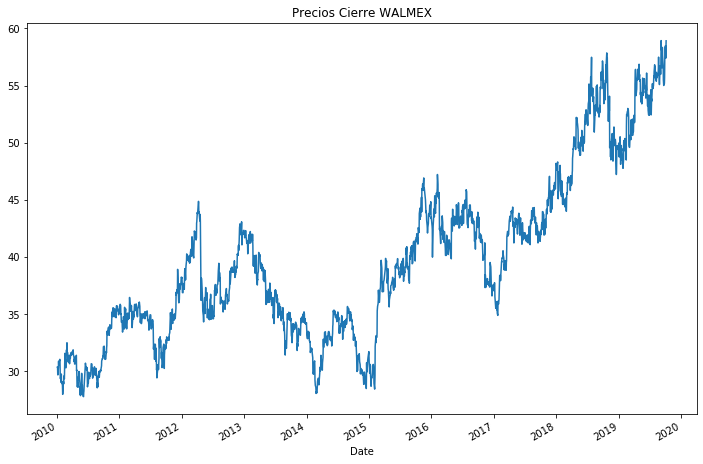

In [53]:
walmex['Cierre'].plot(figsize=(12,8), title='Precios Cierre WALMEX')

#### <font color='navygray'>Retornos</font>

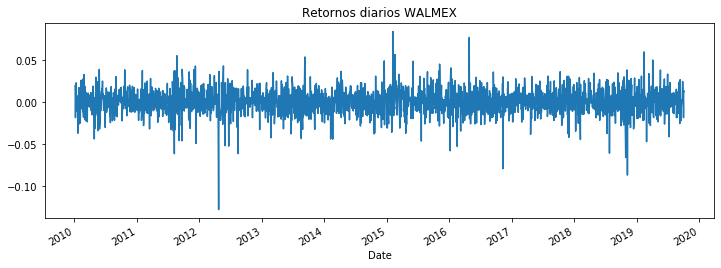

In [56]:
walmex['Ret'].plot(figsize=(12,4), title='Retornos diarios WALMEX')

#### <font color='navygray'>Histograma</font>

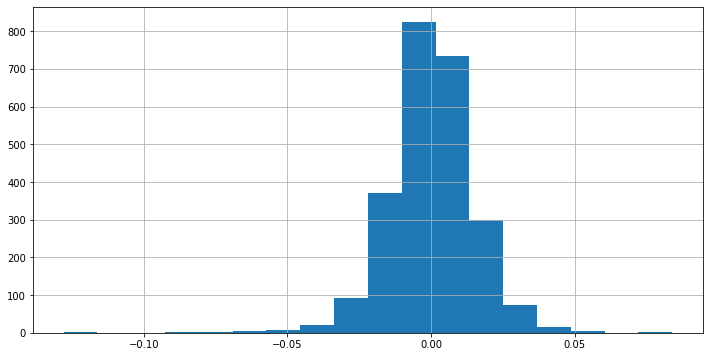

In [52]:
walmex['Ret'].hist(figsize=(12,6), bins = 18)

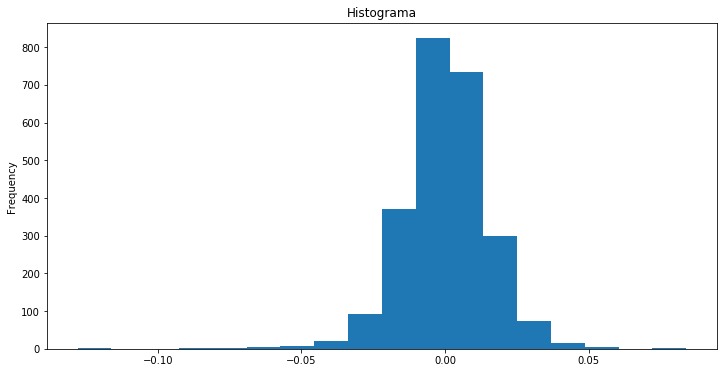

In [58]:
walmex['Ret'].plot(kind='hist', figsize=(12,6), bins = 18, title='Histograma')